# Exercise 6.1

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [2]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/local/Challenge_Five')

In [3]:
cols = ['Party']
for i in range(16):
    cols.append('X'+ str(i+1))
print cols

['Party', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']


In [4]:
df = pd.read_csv('house-votes-84.data', names = cols)

In [5]:
df = df.replace('?', np.NaN).replace('y', 1).replace('n', 0)
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
df.fillna(df.mean(), inplace = True)
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [7]:
X = df.drop(['Party'], axis = 1)
y = df['Party']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4444)

KNN

In [8]:
reg = KNeighborsClassifier(n_neighbors = 6)
model = reg.fit(X_train, y_train)
knny_pred = model.predict(X_test)
print accuracy_score(y_test, knny_pred)

knnrecscore = recall_score(y_test, knny_pred, pos_label = 'democrat')
knnprecscore = precision_score(y_test, knny_pred, pos_label = 'democrat')
print knnrecscore
print knnprecscore
print f1_score(y_test, knny_pred, pos_label = 'democrat')

0.931297709924
0.961038961039
0.925
0.942675159236


Logistic Regression

In [9]:
model = LogisticRegression()
modelfit = model.fit(X_train, y_train)
logity_pred = modelfit.predict(X_test)
print accuracy_score(y_test, logity_pred)

logitrecscore = recall_score(y_test, logity_pred, pos_label = 'democrat')
logitprecscore = precision_score(y_test, logity_pred, pos_label = 'democrat')
print logitrecscore
print logitprecscore
print f1_score(y_test, logity_pred, pos_label = 'democrat')

0.93893129771
0.974025974026
0.925925925926
0.949367088608


GaussianNB

In [10]:
naivemodel = GaussianNB()
naivefit = naivemodel.fit(X_train, y_train)
naivey_pred = naivefit.predict(X_test)
print accuracy_score(y_test, naivey_pred)

naiverecscore = recall_score(y_test, naivey_pred, pos_label = 'democrat')
naiveprecscore = precision_score(y_test, naivey_pred, pos_label = 'democrat')
print naiverecscore
print naiveprecscore
print f1_score(y_test, naivey_pred, pos_label = 'democrat')

0.93893129771
0.987012987013
0.915662650602
0.95


SVM

In [11]:
svcmodel = SVC()
svcfit = svcmodel.fit(X_train, y_train)
svcy_pred = svcfit.predict(X_test)
print accuracy_score(y_test, svcy_pred)

svcrecscore = recall_score(y_test, svcy_pred, pos_label = 'democrat')
svcprecscore = precision_score(y_test, svcy_pred, pos_label = 'democrat')
print svcrecscore
print svcprecscore
print f1_score(y_test, svcy_pred, pos_label = 'democrat')

0.954198473282
0.974025974026
0.949367088608
0.961538461538


DecisionTree

In [12]:
dectreemodel = DecisionTreeClassifier()
dectreefit = dectreemodel.fit(X_train, y_train)
dectreey_pred = dectreefit.predict(X_test)
print accuracy_score(y_test, dectreey_pred)

dectreerecscore = recall_score(y_test, dectreey_pred, pos_label = 'democrat')
dectreeprecscore = precision_score(y_test, dectreey_pred, pos_label = 'democrat')
print dectreerecscore
print dectreeprecscore
print f1_score(y_test, dectreey_pred, pos_label = 'democrat')

0.954198473282
0.974025974026
0.949367088608
0.961538461538


Random Forest

In [13]:
randformodel = RandomForestClassifier()
randforfit = randformodel.fit(X_train, y_train)
randfory_pred = randforfit.predict(X_test)
print accuracy_score(y_test, randfory_pred)

randforrecscore = recall_score(y_test, randfory_pred, pos_label = 'democrat')
randforprecscore = precision_score(y_test, randfory_pred, pos_label = 'democrat')
print randforrecscore
print randforprecscore
print f1_score(y_test, randfory_pred, pos_label = 'democrat')

0.961832061069
0.974025974026
0.961538461538
0.967741935484


# Exercise 6.2

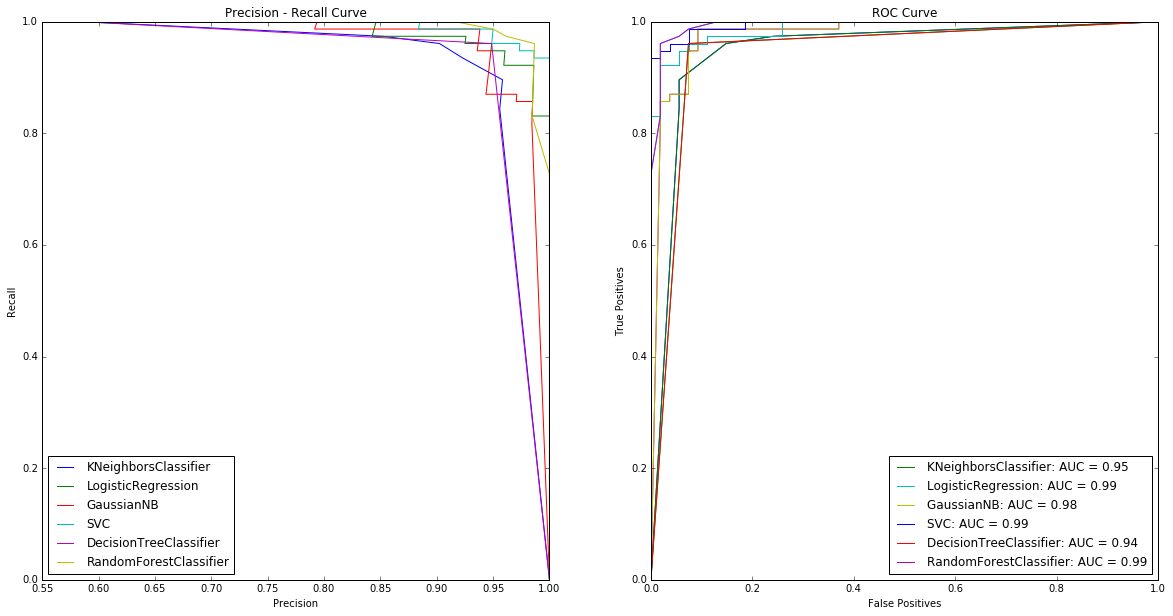

In [41]:
modellist = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier()]
plt.figure(figsize = (20, 10))
for model in modellist:
    modelfit = model.fit(X_train, y_train)
    precision, recall, threshold = precision_recall_curve(y_test, modelfit.predict_proba(X_test)[:,0], pos_label = 'democrat')
    fpr, tpr, threshold2 = roc_curve(y_test, modelfit.predict_proba(X_test)[:,0], pos_label = 'democrat')
    plt.subplot(1,2,1)
    plt.plot(precision, recall, label=model.__str__().split('(')[0])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("Precision - Recall Curve")
    plt.legend(loc = 0)
    
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, label=model.__str__().split('(')[0] + ": AUC = " + str(round(auc(fpr,tpr),2)))
    plt.xlabel("False Positives")
    plt.ylabel("True Positives")
    plt.title("ROC Curve")
    plt.legend(loc = 0)

# Exercise 6.3

In [58]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/local/Challenge_Five')

In [59]:
cols = ['Age', 'Year', 'Nodes', 'Survival']

In [60]:
dfmed = pd.read_csv('haberman.data', names = cols)

In [61]:
dfmed.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [62]:
dfmed['Survival'] = dfmed['Survival'].replace(2, 0)

In [51]:
X = dfmed.drop(['Survival'], axis = 1)
y = dfmed['Survival']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [53]:
logmodel = LogisticRegression()
logmodelfit = logmodel.fit(X_train, y_train)

In [67]:
precision, recall, threshold = precision_recall_curve(y_test, logmodelfit.predict_proba(X_test)[:,0], pos_label = 1)
fpr, tpr, threshold2 = roc_curve(y_test, logmodelfit.predict_proba(X_test)[:,0], pos_label = 1)

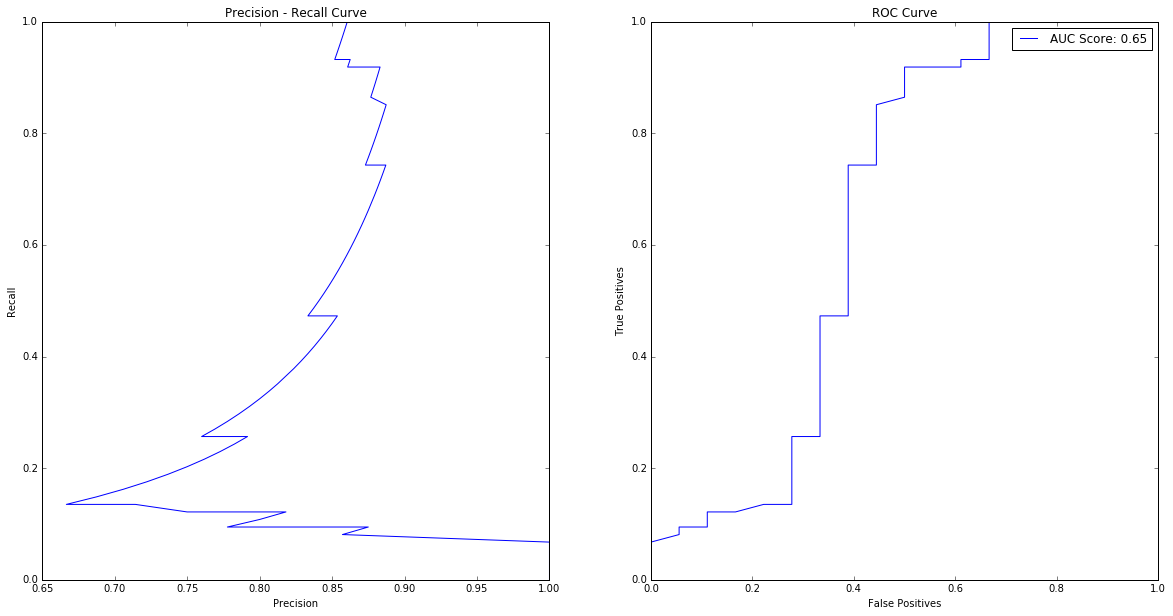

In [75]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision - Recall Curve")

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label = 'AUC Score: ' + str(round(auc(fpr, tpr),2)))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.title("ROC Curve")
plt.legend(loc = 0)